#  高德API调用


## 获取地理编码&逆地理编码


>❗ 地理编码/逆地理编码 API 是通过 HTTP/HTTPS 协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力。❗ 

In [34]:
# 导入模块
import requests 
import pandas as pd


地理编码请求URL = 'https://restapi.amap.com/v3/geocode/geo?parameters'
key ='858f15d2f3445f35c2cf1bc7dda8c6d4'# 高德API获取密码
address='华发商都'
city='珠海市'

def 获取地理编码():
    get_geocode={
        'key':key,
        'address':address,
        'city':city
        }
    geo_response = requests.get(地理编码请求URL,get_geocode).json()
    return(geo_response)

地理编码=获取地理编码()
print('地理编码',地理编码)

def 逆地理编码数据():
    逆地理编码请求URL='https://restapi.amap.com/v3/geocode/regeo?parameters'
    location=地理编码['geocodes'][0]['location']   

    get_NIgeocode={
        'key':key,
        'city':city,
        'location':location,
        'extensions':'all'
        }
    逆地理_response = requests.get(逆地理编码请求URL,get_NIgeocode).json()
    return(逆地理_response['regeocode'])

逆地理编码=逆地理编码数据()
print('逆地理编码',逆地理编码)

地理编码 {'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省珠海市香洲区华发商都', 'country': '中国', 'province': '广东省', 'citycode': '0756', 'city': '珠海市', 'district': '香洲区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440402', 'street': [], 'number': [], 'location': '113.510891,22.224599', 'level': '兴趣点'}]}
逆地理编码 {'roads': [{'id': '1853F49F0220457289', 'location': '113.511,22.2235', 'direction': '西北', 'name': '珠海大道辅路', 'distance': '133.989'}, {'id': '1853F49F0220452326', 'location': '113.512,22.2235', 'direction': '西北', 'name': '珠海大道', 'distance': '155.837'}, {'id': '1853F49F022045516', 'location': '113.508,22.2235', 'direction': '东', 'name': '南湾北路', 'distance': '312.623'}], 'roadinters': [{'second_name': '珠海大道辅路', 'first_id': '1853F49F022045603922', 'second_id': '1853F49F0220457289', 'location': '113.5142478,22.22511', 'distance': '350.174', 'first_name': '明达路', 'direction': '西'}], 'fo

#### 周边信息

In [49]:
#预览前五项
逆地理附近表格=pd.json_normalize(逆地理编码['pois'])
逆地理附近表格[['direction','businessarea','address','name','tel','type','distance']].head()

,direction,businessarea,address,name,tel,type,distance
0,西南,南屏,珠海大道8号,华发商都,0756-8335588,购物服务;商场;购物中心,5.70251
1,东,南屏,珠海大道8号华发商都,华发商都B馆,[],购物服务;商场;购物中心,43.9808
2,东,南屏,南屏镇珠海大道8号华发商都D馆2层,黄记煌三汁焖锅(华发商都店),0756-8287166,餐饮服务;中餐厅;中餐厅,37.859
3,东北,南屏,珠海大道8号华发商都B馆一楼B1006,清迈泰·泰式餐厅,0756-8975188,餐饮服务;外国餐厅;泰国/越南菜品餐厅,58.3341
4,西,南屏,珠海大道8号华发商都1号楼2层A2045号,探鱼(华发商都店),0756-8305151,餐饮服务;中餐厅;四川菜(川菜),162.316


#### 详细信息

In [36]:

当前详细位置=逆地理编码['formatted_address']
当前详细位置

'广东省珠海市香洲区南屏镇喜点茶餐厅(华发商都店)华发商都'

#### 行政信息

In [37]:

当前详细位置分级表格=pd.json_normalize(逆地理编码['addressComponent'])
当前详细位置分级表格

,city,province,adcode,district,towncode,country,township,businessAreas,citycode,streetNumber.number,streetNumber.location,streetNumber.direction,streetNumber.distance,streetNumber.street,building.name,building.type,neighborhood.name,neighborhood.type
0,珠海市,广东省,440402,香洲区,440402102000,中国,南屏镇,"[{'location': '113.49734,22.219333', 'name': '...",0756,8号,"113.511129,22.2249481",东北,45.8984,珠海大道,[],[],[],[]


## 路径规划

>❗路径规划API是一套以HTTP形式提供的步行、公交、驾车查询及行驶距离计算接口，返回JSON 或 XML格式的查询数据，用于实现路径规划功能的开发。 ❗

#### 步行路径

In [38]:
# 导入模块
import requests 
import pandas as pd
request_url = "https://restapi.amap.com/v3/geocode/geo?parameters"

# 输入起始点名称
start_address = '华发商都'
start_city='珠海市'

end_address = '圆明新园'
end_city='珠海市'


def 获取起点坐标():
    start_parameters={'key':key,
               'address':start_address,
                'output':'JSON',
                'city':start_city
               }
    start_response = requests.get(request_url,start_parameters)
    start_point_all=start_response.json()
    start_point=start_point_all['geocodes'][0]['location']
    return(start_point)
start_point=获取起点坐标()
# print("起始坐标：",start_point)

def 获取终点坐标():
    end_parameters={'key':key,
               'address':end_address,
                'output':'JSON',
               }
    end_response = requests.get(request_url,end_parameters)
    end_point_all=end_response.json()
    end_point=end_point_all['geocodes'][0]['location']
    return(end_point)
end_point=获取终点坐标()
# print("终点坐标:",end_point)

# 步行路线规划
def 路线规划():
    road_request_url='https://restapi.amap.com/v3/direction/walking?parameters'  
    road_parameters={'key':key,
                               'origin':start_point,
                               'destination':end_point,
                              "city":"珠海市"
                                }
    road_response = requests.get(road_request_url,road_parameters)
    步行总数据=road_response.json()
    return(步行总数据)

步行总数据=路线规划()
# print(步行总数据)

步行详细=步行总数据['route']['paths'][0]['steps']
# print(步行详细)

步行描述 = [ i['instruction'] for i in 步行详细] #推导式取列表中['instruction']内容为单纯的步行描述。
步行描述

步行描述表格=pd.json_normalize(步行详细)
步行描述表格.head() # 预览表格

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向东北步行266米右转,东北,[],266,213,"113.511593,22.224575;113.512235,22.224835;113....",右转,[],0
1,沿明达路向东南步行60米左转,东南,明达路,60,48,"113.513945,22.225582;113.514197,22.225087",左转,[],0
2,沿华新街向东北步行358米左转,东北,华新街,358,286,"113.514197,22.225082;113.514249,22.225109;113....",左转,[],0
3,步行33米左转,[],[],33,26,"113.517318,22.22651;113.517313,22.226558;113.5...",左转,[],0
4,沿华新街向东北步行618米向右前方行走,东北,华新街,618,494,"113.517522,22.226593;113.51849,22.227049;113.5...",向右前方行走,[],0


#### 公交路径

In [50]:
def 公交路线规划(key):
    bus_request_url='https://restapi.amap.com/v3/direction/transit/integrated?parameters'     
    


    bus_parameters={'key':key,
                 'origin':start_point,
                 'destination':end_point,
                 "city":"珠海市"
           }

    公交返回数据 = requests.get(bus_request_url,bus_parameters)
    return(公交返回数据)

公交总数据=公交路线规划(key).json()
公交总数据



{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '5',
 'route': {'origin': '113.510891,22.224599',
  'destination': '113.537895,22.240004',
  'distance': '4069',
  'taxi_cost': '0.0',
  'transits': [{'cost': '2.0',
    'duration': '2283',
    'nightflag': '0',
    'walking_distance': '832',
    'distance': '5762',
    'missed': '0',
    'segments': [{'taxi': [],
      'walking': {'origin': '113.511108,22.224297',
       'destination': '113.511024,22.222731',
       'distance': '494',
       'duration': '423',
       'steps': [{'instruction': '步行104米左转',
         'road': [],
         'distance': '104',
         'duration': [],
         'polyline': '113.511108,22.224297;113.511017,22.224245;113.510536,22.224020;113.510277,22.223793',
         'action': '左转',
         'assistant_action': []},
        {'instruction': '步行148米右转',
         'road': [],
         'distance': '148',
         'duration': [],
         'polyline': '113.510269,22.223789;113.510330,22.223667;113.510406,

In [51]:
  # 查看路线长度

公交最快捷方式=公交总数据["route"]["transits"][0]["segments"]    
# print(length(公交最快捷方式))


公交处理 = [ i["bus"]["buslines"][0] for i in 公交最快捷方式[:len(公交最快捷方式)-1]]


公交处理表格 = pd.json_normalize(公交处理)
公交处理表格[['name','type','via_stops','arrival_stop.name']]

,name,type,via_stops,arrival_stop.name
0,G991路(金斗湾客运站--圆明新园),普通公交线路,"[{'name': '华发新城', 'id': '900000126603008', 'lo...",圆明新园


## 行政区域查询

>❗行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。❗

In [54]:
def district(keywords:str):
   
    parameters = {
        'key':key,
        'keywords':keywords,
        "subdistrict":"3",
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/config/district?parameters", params=parameters)
    data = r.json()['districts'][0]['districts']
    print("----"+keywords + "的行政区域如下----")
    for i in data:
        print(i['name'])
    return 
    

In [43]:
district('浙江')

----浙江有以下几个行政区域----
宁波市
温州市
嘉兴市
舟山市
台州市
丽水市
绍兴市
湖州市
衢州市
金华市
杭州市


## 搜索POI

>❗搜索服务API是一类简单的HTTP接口，提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。❗

In [56]:
def poi(keywords:str,city:str):
  
    parameters = {
        'key':key,
        'city':city,
        'keywords':keywords,
#      "types":"餐饮服务",（选填）
        'output':'json',
        
    }
    r = requests.get ("https://restapi.amap.com/v3/place/text?parameters", params=parameters)
    data = r.json()
    pois = []
    pois.extend(data['pois'])
    import pandas as pd
    df_input = pd.DataFrame(pois)
    return df_input

        
    

In [55]:
parameters = {
    'key':key,
    'city':"珠海",
    'keywords':"海底捞",
    "types":"餐饮服务",
    'output':'json',

}
r = requests.get ("https://restapi.amap.com/v3/place/text?parameters", params=parameters)
data = r.json()
pois = []
pois.extend(data['pois'])
data

import pandas as pd
cot = pd.json_normalize(data['pois'])
cot

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,...,cityname,adname,importance,shopid,shopinfo,poiweight,photos,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFKB7G1E,B0FFGX31UO,202,海底捞火锅(摩尔广场店),餐饮服务;中餐厅;火锅店,050117,diner,迎宾南路2095号摩尔广场3层,"113.551148,22.233085",0756-8338918;0756-8336818,...,珠海市,香洲区,[],[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.5,132.00,0
1,B0FFGBAGY3,B0FFGBAK70,202,海底捞火锅(扬名店),餐饮服务;中餐厅;火锅店,050117,diner,凤凰南路1066号扬名广场2期8层,"113.579510,22.275609",0756-6159598;0756-6159599,...,珠海市,香洲区,[],[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,5.0,127.00,0


In [47]:
def POI周边():
    url = "https://restapi.amap.com/v3/place/around?parameters "
    params = {
        "key":key,
        "location":start_point,
        "keywords":"娱乐", 
        "radius":"10000", 
        "output":"json",
        "city":"珠海",
        }
    POI周边数据 = requests.get(url,params=params)
    return(POI周边数据)

POI周边返回 = POI周边().json()
POI周边返回
POI周边返回表格 = pd.json_normalize(POI周边返回['pois'])
POI周边返回表格 

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,...,shopid,shopinfo,poiweight,photos,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering,biz_ext.hotel_ordering,biz_ext.star,biz_ext.lowest_price
0,B0FFKSBVWU,[],[],Mr怪喵真人恐怖密室逃脱,体育休闲服务;娱乐场所;娱乐场所,080300,[],南屏镇南湾北路30号栋303,"113.508167,22.225862",18922180123,...,[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,5.0,143.00,NaN,NaN,NaN,NaN
1,B0FFIF2S8F,[],[],星际前线电玩城,体育休闲服务;娱乐场所;游戏厅,080305,[],南湾北路20号(box创意区2栋3楼),"113.507366,22.224011",0756-2283000,...,[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,[],NaN,NaN,NaN,NaN
2,B0FFGHHCNB,[],[],格拉斯哥KTV,体育休闲服务;娱乐场所;KTV,080302,[],南坪环屏路商业街3号楼南坪环屏路商业街3号楼二楼东面铺位,"113.507141,22.224658",0756-8301500,...,[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,19.00,NaN,NaN,NaN,NaN
3,B0FFLM3NL7,[],[],弘桥商场电玩城,体育休闲服务;娱乐场所;游戏厅,080305,[],[],"113.507037,22.225025",[],...,[],0,[],[],[],[],NaN,NaN,NaN,NaN
4,B0FFF0EOMZ,B02F402ZF3,202,嘉迪乐量贩式KTV,体育休闲服务;娱乐场所;KTV,080302,[],南屏环屏路18号(泰锋电器3层),"113.506933,22.224187",0756-8698768,...,[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.0,73.00,NaN,NaN,NaN,NaN
5,B0FFMBT69Q,[],[],喜剧推理轰趴馆,体育休闲服务;娱乐场所;娱乐场所,080300,[],南屏镇南湾北路32号V12文化创意产业园区5栋2号楼4楼5427室,"113.507377,22.226367",18923370026,...,[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,[],[],NaN,NaN,NaN,NaN
6,B0FFKKJI72,B0FFFYWT4I,202,城市英雄动漫娱乐城,体育休闲服务;娱乐场所;游戏厅,080305,[],南湾北路45号弘桥商城一楼,"113.506824,22.225453",13543062294,...,[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,5.0,43.00,NaN,NaN,NaN,NaN
7,B0FFLEWRZ1,B0FFFYWT4I,202,第九街区真人npc密室,体育休闲服务;娱乐场所;娱乐场所,080300,[],南湾北路45号弘桥商城4F,"113.506582,22.225647",13411394158;18229966302,...,[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.5,50.00,NaN,NaN,NaN,NaN
8,B0FFKKN1UP,B0FFFYWT4I,202,行乐沉浸式密室逃脱,体育休闲服务;体育休闲服务场所;体育休闲服务场所,080000,[],南湾北路弘桥商城4楼(华发商都西门对面),"113.506587,22.225942",18928028644,...,[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,[],[],NaN,NaN,NaN,NaN
9,B0FFL9BCN4,[],[],棋牌室休闲娱乐,体育休闲服务;娱乐场所;娱乐场所,080300,[],[],"113.513445,22.220905",[],...,[],0,[],[],[],[],NaN,NaN,NaN,NaN


## IP定位

>❗IP定位是一个简单的HTTP接口，根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置。❗

In [57]:
def ip(ip:str):
  
    parameters = {
        'key':key,
        'ip':ip,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/ip?parameters", params=parameters)
    data = r.json()
    del data['status']
    del data['info']
    df = ["省份：%s"%(data['province']),"地区：%s"%(data['city']),"地理编码：%s"%(data['adcode']),"经纬度： %s"%(data['rectangle'])]
    print("ip:"+ip)
    for i in df:
        print(i)
    return    
    

In [58]:
ip("182.254.192.28")

ip:182.254.192.28
省份：广东省
地区：广州市
地理编码：440100
经纬度： 113.1017375,22.93212254;113.6770499,23.3809537


## 静态地图

>❗静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形。❗

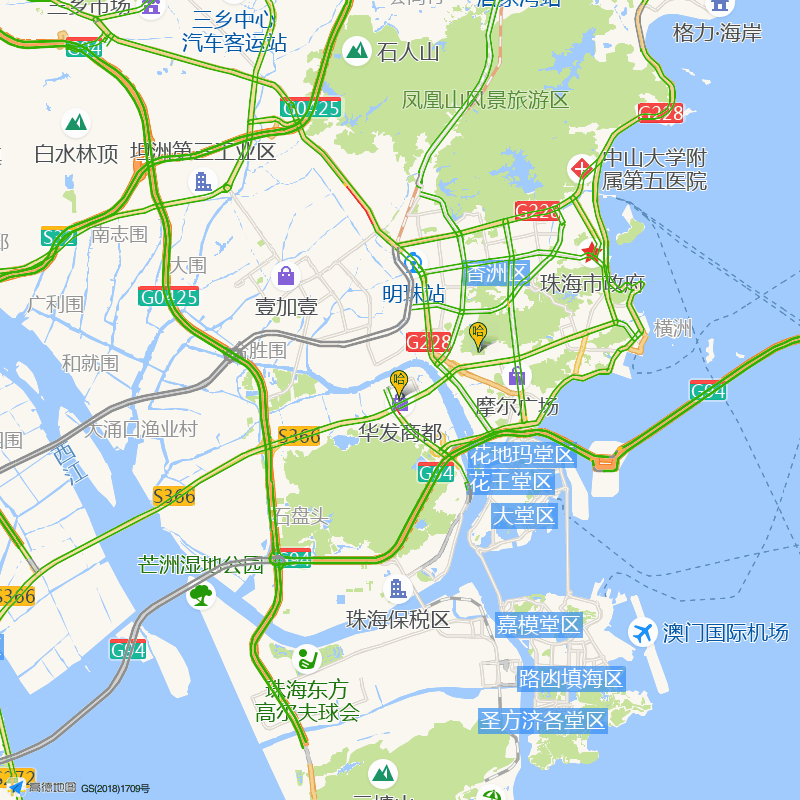

In [62]:
from PIL import Image
from io import BytesIO

def 静态地图():
    markers='mid,0xFFFF00,哈:'+start_point+';'+end_point
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':start_point,
        'zoom':'10',     # 设置地图大小。数字越大，到达展示准确度越高。
        'scale':'2',     # 1：小图，2：大图
        'traffic':'1',   # 0：不显示交通/1：显示
        'output':'json',
        "markers":markers
        }
    静态地图数据 = requests.get(url,params=params)
    return(静态地图数据)

生成图 = Image.open(BytesIO(静态地图().content))
生成图

## 坐标转换

>❗坐标转换是一类简单的HTTP接口，能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。❗

In [63]:
def assistant(locations:str,coordsys:str):
  
    
    parameters = {
        'key':key,
        'coordsys':coordsys, # 可选值：gps,mapbar,baidu,autonavi
        'locations':locations,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params=parameters)
    data = r.json()['locations']
    return data

In [64]:
assistant("116.481499,39.990475|116.481499,39.990375",'gps')

'116.487585177952,39.991754014757;116.487585177952,39.991653917101'

## 批量请求

>❗批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合，目前最多支持20个子请求。 返回的顺序与子请求的顺序一致。❗

In [65]:
# 导入模块
import json

def 批量请求():
    url='https://restapi.amap.com/v3/batch?key='+key

    params= {
        "ops": [
            {
                "url": "/v3/place/around?offset=10&page=1&key=dfc2f1b854462bf8ef8d64578443ebe4&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            },
            {
                "url": "/v3/place/around?offset=10&page=1&key=dfc2f1b854462bf8ef8d64578443ebe4&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            }
        ]
            }

    params=json.dumps(params)  


    请求返回 = requests.post(url=url,data=params)
    return(请求返回)

批量请求().json()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

## 天气查询

>❗天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。❗

In [66]:
def weather(city:str):
    
    parameters = {
        'key':key,
        'city':city,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params=parameters)
    data = r.json()
    
    return data

In [67]:
weather('珠海')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '珠海市',
   'adcode': '440400',
   'weather': '阴',
   'temperature': '20',
   'winddirection': '北',
   'windpower': '≤3',
   'humidity': '91',
   'reporttime': '2020-04-23 16:52:37'}]}

## 输入提示

>❗输入提示是一类简单的HTTP接口，提供根据用户输入的关键词查询返回建议列表。❗

In [70]:
def 输入提示(keywords):
    url = "https://restapi.amap.com/v3/assistant/inputtips?parameters"
    params = {
        "key":key,
        "keywords":keywords,
        "types":"050301",
        "location":start_point,
        "city":"珠海市",
        "output":"json",
        "datatype":"all",
        "sig":None,
        "citylimit":True

        
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

input_for_search = pd.json_normalize(输入提示(keywords=input("输入关键字:"))["tips"])
input_for_search[["name","address","district","location"]]

输入关键字:餐饮


,name,address,district,location
0,蛙小侠铁锅牛蛙,珠海大道8号华发商都B馆2层B2007号商铺,广东省珠海市香洲区,"113.510896,22.224596"
1,西贝莜面村(华发商都店),珠海大道8号华发商都1号楼3层A3005,广东省珠海市香洲区,"113.510026,22.224736"
2,探鱼(华发商都店),珠海大道8号华发商都1号楼2层A2045号,广东省珠海市香洲区,"113.509406,22.224108"
3,汉堡王(珠海华发商都店),珠海大道8号华发商都2栋1层B1001室,广东省珠海市香洲区,"113.510753,22.224797"
4,汕头八合里海记牛肉店(华发商都店),珠海大道8号华发商都B馆2层B2028,广东省珠海市香洲区,"113.511318,22.224619"
5,肯德基(华发商都店),珠海大道8号华发商都2号楼1层A1028、A1029号,广东省珠海市香洲区,"113.510201,22.224167"
6,必胜客(珠海市华发店),"珠海大道8号华发商都B馆1层B1028,B1029号商铺",广东省珠海市香洲区,"113.510954,22.224445"
7,黄记煌三汁焖锅(华发商都店),南屏镇珠海大道8号华发商都D馆2层,广东省珠海市香洲区,"113.511257,22.224634"
8,胡桃里音乐酒馆,珠海大道8号华发商都B馆B1007、B1008号,广东省珠海市香洲区,"113.511493,22.225194"
9,艾蔻ACCRO餐吧(华发商都店),珠海大道8号华发商都B馆1层,广东省珠海市香洲区,"113.511314,22.224613"


## 交通态势

>❗交通态势是一类简单的HTTP接口，提供根据用户输入的内容能够返回希望查询的交通态势情况。❗

In [73]:
def 交通():
    url = "https://restapi.amap.com/v3/traffic/status/circle?parameters"
   
    params = {
     "key":key,
     "location":start_point,
     "radius":"5000",
     "level":"5",
     "extensions":"all",
     "output":"json",
     "sig":None
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

df_traffic = pd.json_normalize(交通()["trafficinfo"])
df_traffic


,description,roads,evaluation.expedite,evaluation.congested,evaluation.blocked,evaluation.unknown,evaluation.status,evaluation.description
0,南湾北路：自东向西缓慢，反向畅通。,"[{'name': '南湾北路', 'status': '2', 'direction': ...",63.64%,9.09%,0.00%,27.27%,2,轻度拥堵


## 地理围栏

>❗地理围栏服务是一类HTTP接口，提供在服务端，增删改查地理围栏的功能，同时支持对于设备与围栏关系进行监控。❗

In [74]:
url='https://restapi.amap.com/v4/geofence/meta?key='+key

params={
    "name": "商圈",
    "center": '113.290447,23.093008',
    "radius": "1000",
    "enable": "true",
    "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
    "time": "00:00,11:59;13:00,20:59",
    "alert_condition": "enter;leave"
    }
response=requests.post(url,json=params)
response.json()

{'data': {'gid': 'ce7b1287-9b5f-4948-be79-0b8b2d674d5a',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [75]:
params={
    "key":key,
    "id": "0",
    }
response=requests.get(url,params=params)
response.json()

{'data': {'page_no': 1,
  'page_size': 20,
  'rs_list': [{'adcode': '0',
    'alert_condition': 'enter;leave',
    'center': '113.290447,23.093008',
    'create_time': '2020-04-23 17:14:01',
    'enable': True,
    'fixed_date': '',
    'gid': 'ce7b1287-9b5f-4948-be79-0b8b2d674d5a',
    'id': '0',
    'key': '858f15d2f3445f35c2cf1bc7dda8c6d4',
    'name': '商圈',
    'points': '',
    'radius': 1000.0,
    'repeat': 'Mon,Tues,Wed,Thur,Fri,Sat,Sun',
    'time': '00:00,11:59;13:00,20:59',
    'valid_time': '2020-07-22'}],
  'total_record': 1},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## 轨迹纠偏


>❗根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。❗

In [81]:
url='https://restapi.amap.com/v4/grasproad/driving?key='+key


body=[{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
},
    {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, 
    {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, 
    {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, 
    {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]

response=requests.post(url,data=json.dumps(body))
response.json()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

# 设计应用


>❗ 寻找附近停车位的应用❗ 

| 高德API      |    产品需求 | 产品描述  |
| :-------- | --------:| :--: |
| IP定位  | 城市停车位难求 |  根据IP定位  |
| 搜索POI  | 目前较少寻找停车位的app |  搜索周边停车位|
| 路线规划|   出行方式选择| 路线导航  |
